## Модель коррекции ошибок
Пусть $y_t, x_t \sim I(1)$, то есть интегрированные ряды первого порядка. Модель исправления ошибок имеет следующий вид:

$$\vartriangle y_t=\sum_{i=1}^p \alpha_i \vartriangle y_{t-i}+\sum_{i=0}^q \beta_i \vartriangle x_{t-i}-\gamma(y_{t-1}-\alpha_L-\beta_L x_{t-1})+\varepsilon_t$$


где $\varepsilon_t$ — стационарный процесс (например, белый шум), а $\vartriangle$ - первая производная.

Поскольку по предположению первые разности временных рядов стационарны, то выражение в скобках тоже должно быть стационарным процессом, следовательно, существует долгосрочная зависимость между временными рядами

$$y^*_{t}=\alpha_L+\beta_L x^*_{t}+u_t$$

где $u_t$ — стационарный процесс.

То есть временные ряды коинтегрированы. Таким образом, модель отражает краткосрочную зависимость между изменениями переменных и коррекцию динамики этих рядов в зависимости от величины отклонения (ошибки) от долгосрочной зависимости.

Простейший вариант такой модели, когда $$p=q=0$$

$$\vartriangle y_t=\beta_0 \vartriangle x_{t}-\gamma(y_{t-1}-\alpha_L-\beta_L x_{t-1})+\varepsilon_t$$

В этой модели краткосрочно в среднем изменения зависимой переменной пропорциональны изменению фактора (с учётом стационарной случайной компоненты конечно). Однако, если такая динамика приведет к отклонению от долгосрочной зависимости, то пропорционально этому отклонению корректируется и изменение зависимой переменной. Этот механизм исправления ошибок и гарантирует выполнение долгосрочной зависимости.


## Векторная модель коррекции ошибок
## Vector error correction model (VECM)

$$\Delta y_t = \alpha \beta^T y_{t-1} + \Gamma_1 \Delta y_{t-1} + \dots + \Gamma_{p-1} \Delta y_{t-p+1} + u_t$$

где $\alpha, \beta \in \mathbb{R}^{K \times r}$ и $\Gamma_i \in \mathbb{R}^{K \times K}$ for $i = 1, \dots, p-1$ -- параметры, а $u_t$ - $K$-мерный белый шум. И $\alpha$, и $\beta$ имеют ранг коинтеграции $r$

In [97]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import pandas
import statsmodels.datasets.interest_inflation.data as d
from statsmodels.tsa.base.datetools import dates_from_str

In [ ]:
# Данные по ВВП и инфляции
'''
Dp        - Delta log gdp deflator
R         - nominal long term interest rate
'''
df = d.load_pandas().data
dates = df[["year", "quarter"]].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
data = df[["Dp", "R"]]
data.index = pandas.DatetimeIndex(quarterly)

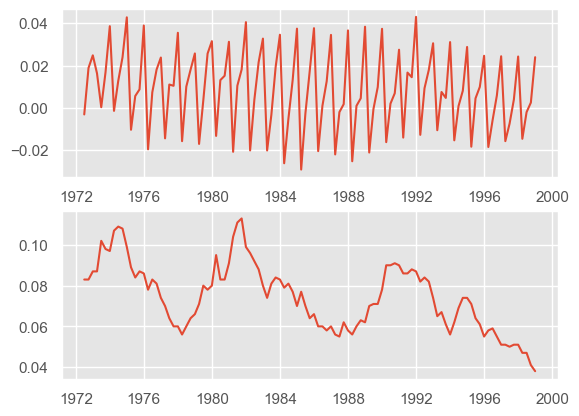

In [99]:
plt.figure()
ax = plt.subplot(211)
ax.plot(data.index, data["Dp"])
ax = plt.subplot(212)
ax.plot(data.index, data["R"])
plt.show()

У нас есть две переменные "Dp" (инфляция) и "R" (проценты), поэтому в нашем примере $K=2$.

На графике мы видим, что переменная "Dp" имеет сильный сезонный эффект, который нам надо учесть (`seasons=4`). 

Мы также замечаем, что все наблюдения "R" больше нуля, поэтому мы включим отсекаемый элемент. Можно показать, что VECM с точкой отсечения можно записать как

$$\Delta y_t = \alpha \bar{\beta}^T \begin{pmatrix}y_{t-1}\\1\end{pmatrix} + \Gamma_1 \Delta y_{t-1} + \dots + \Gamma_{p-1} \Delta y_{t-p+1} + u_t$$

с матрицей $\bar{\beta}^T = \begin{pmatrix}\beta^T & -\beta^T\mu\end{pmatrix}$ и $\mu \in \mathbb{R}^K$, являющейся точкой отсечения. Таким образом, точка отсечения появляется только внутри соотношения коинтеграции $\alpha \beta^T y_{t-1}$. В следующих ячейках мы укажем этот термин, используя `deterministic="ci"`

С помощью `select_order()` мы можем выбрать порядок запаздывания в соответствии с различными информационными критериями (AIC, BIC, HQIC и FPE). Чтобы найти наилучшее количество запаздывающих разностей в соответствии с определенным информационным критерием, мы можем использовать метод `summary()` возвращаемого объекта `LagOrderResults`. Затем мы ищем звездочку (\*) (=минимальное значение) в интересующем столбце в `SimpleTable`. Левая ячейка строки звезды показывает количество запаздывающих разностей для выбора. Таким образом, мы бы выбрали порядок запаздывания 3 в следующей ячейке, если бы нас интересовал AIC.

In [100]:
lag_order = select_order(data=data, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

,AIC,BIC,FPE,HQIC
0,-20.74,-20.37*,9.838e-10,-20.59*
1,-20.73,-20.25,9.984e-10,-20.53
2,-20.65,-20.06,1.079e-09,-20.41
3,-20.77*,-20.08,9.561e-10*,-20.49
4,-20.71,-19.91,1.020e-09,-20.38
5,-20.68,-19.77,1.054e-09,-20.31
6,-20.64,-19.63,1.094e-09,-20.23
7,-20.59,-19.47,1.162e-09,-20.13
8,-20.52,-19.29,1.247e-09,-20.02
9,-20.51,-19.17,1.271e-09,-19.97


In [101]:
print(lag_order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 3, HQIC ->  0>


In [102]:
lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic

(3, 0, 3, 0)

### Ранг коинтеграции

Функция `select_coint_rank` помогает нам выбрать ранг коинтеграции. Атрибут `rank` результирующего объекта `CointRankResults` дает нам нужную информацию.

In [103]:
rank_test = select_coint_rank(data, 0, 3, method="trace",
                              signif=0.05)
rank_test.rank

1

Чтобы увидеть больше информации, мы можем использовать метод `summary()` `CointRankResults`. 

Каждая строка результирующей `SimpleTable` показывает один тест с нулевой гипотезой "Ранг коинтеграции равен r_0" и $H_1$ "Ранг коинтеграции больше r_0 и $\leq$ r_1". 

Последняя строка содержит информацию о ранге коинтеграции для выбора. 

Если его тестовая статистика меньше критического значения, используйте r_0 в качестве ранга коинтеграции. В противном случае используйте r_1.

In [104]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,2,17.17,15.49
1,2,3.032,3.841


In [105]:
print(rank_test)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          17.17          15.49
  1   2          3.032          3.841
-------------------------------------


## Оценка параметров

Чтобы подогнать VECM к данным, мы сначала создаем объект `VECM`, где определяем

1. детерминированные ряды
2. порядок лага
3. ранг коинтеграции.

Мы обсудили все эти аспекты ранее. У нас есть разные предложения по порядку лага в зависимости от используемого нами информационного критерия. Мы будем следовать информационному критерию Акаике (AIC), используя `lag_order.aic`.

Получив экземпляр `VECM`, мы можем вызвать его метод `fit()`, который возвращает объект `VECMResults`. Этот объект предлагает метод `summary()`, перечисляющий все параметры модели с соответствующими стандартными ошибками и т. д.

In [106]:
model = VECM(data, deterministic='ci',coint_rank=2, seasons=4) 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [107]:
vecm_res = model.fit()

In [108]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0158,0.005,3.038,0.002,0.006,0.026
season2,0.0257,0.004,5.713,0.000,0.017,0.035
season3,0.0468,0.003,16.765,0.000,0.041,0.052
L1.Dp,0.0109,0.096,0.114,0.909,-0.176,0.198
L1.R,0.0381,0.113,0.338,0.735,-0.183,0.259
,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0092,0.004,2.050,0.040,0.000,0.018
season2,0.0023,0.004,0.585,0.558,-0.005,0.010
season3,0.0006,0.002,0.232,0.817,-0.004,0.005
L1.Dp,0.0384,0.082,0.466,0.641,-0.123,0.200


Of course, all parameters can be accessed via the `VECMResults` instance.

In [109]:
vecm_res.alpha

array([[-1.08998681,  0.226431  ],
       [ 0.12625532, -0.0764858 ]])

In [110]:
vecm_res.stderr_alpha

array([[0.14273289, 0.04483778],
       [0.12303695, 0.03865054]])

### Получение прогноза

In [111]:
vecm_res.predict(steps=5)

array([[-0.02350432,  0.03958562],
       [-0.00365676,  0.04268253],
       [ 0.00595554,  0.04406684],
       [ 0.02629091,  0.04405137],
       [-0.02224573,  0.04613096]])

In [112]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[-0.02350432  0.03958562]
 [-0.00365676  0.04268253]
 [ 0.00595554  0.04406684]
 [ 0.02629091  0.04405137]
 [-0.02224573  0.04613096]]
lower:
[[-0.03529205  0.0294245 ]
 [-0.01578818  0.02705087]
 [-0.00643963  0.02450442]
 [ 0.01365978  0.02153156]
 [-0.03508154  0.02129924]]
upper:
[[-0.01171659  0.04974674]
 [ 0.00847466  0.0583142 ]
 [ 0.01835071  0.06362926]
 [ 0.03892205  0.06657117]
 [-0.00940992  0.07096267]]


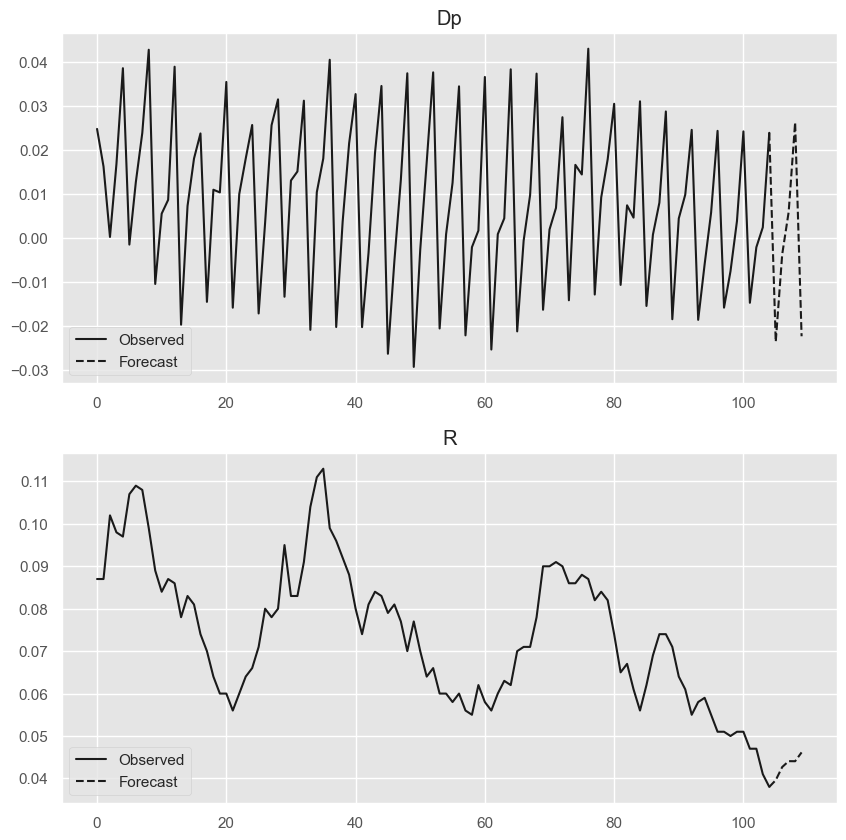

In [113]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

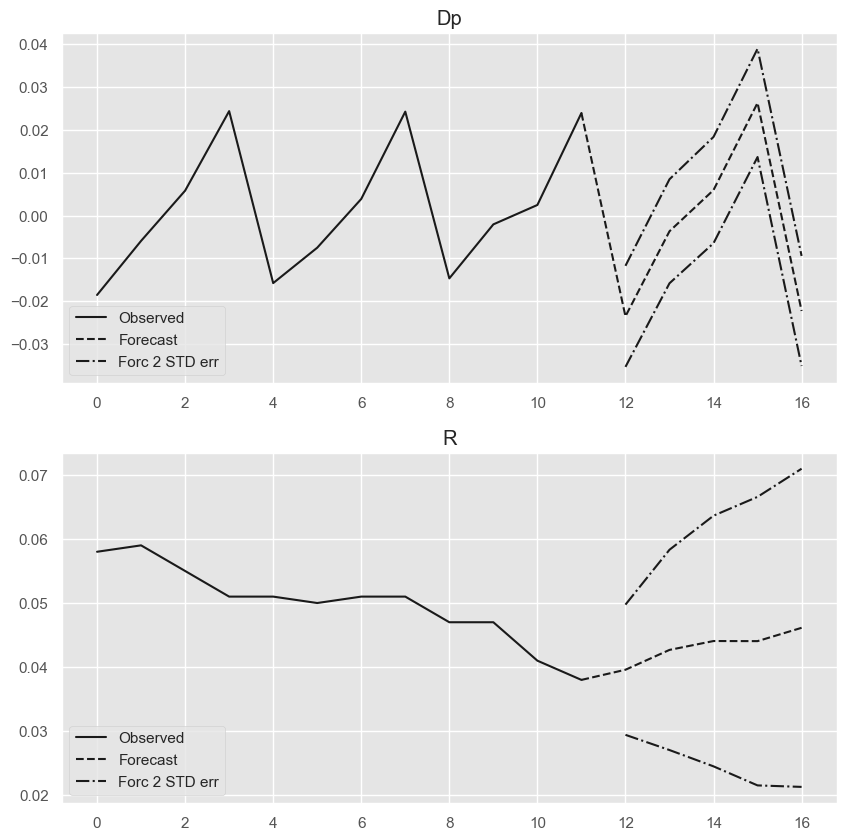

In [114]:
vecm_res.plot_forecast(steps=5, n_last_obs=12)

### VAR-representation

Каждому VECM соответствует VAR-модель. Чтобы получить ее матрицы параметров $A_1, \ldots, A_p$ (где $p$ — количество лагов в уровнях), можно использовать метод `var_rep()`.

In [115]:
print(vecm_res.var_rep[0])  # A_1
vecm_res.var_rep

[[-0.0790589   0.26448546]
 [ 0.1646677   1.15827264]]


array([[[-0.0790589 ,  0.26448546],
        [ 0.1646677 ,  1.15827264]],

       [[-0.0109279 , -0.03805446],
        [-0.03841237, -0.23475844]]])

### MA-representation

Чтобы получить первые $i+1$ матрицы коэффициентов MA-представления, мы можем вызвать метод `ma_rep()`, передав $i$ в качестве аргумента `maxn`.

In [116]:
vecm_res.ma_rep(maxn=2)

array([[[ 1.        ,  0.        ],
        [ 0.        ,  1.        ]],

       [[-0.0790589 ,  0.26448546],
        [ 0.1646677 ,  1.15827264]],

       [[ 0.03887462,  0.24738188],
        [ 0.13929927,  1.15038928]]])

### Тест причинности Гренджера

Напоминание: Тест на причинность Грейнджера — это статистический тест гипотезы для определения того, полезен ли один набор данных временных рядов для прогнозирования другого ряда

In [117]:
granger_results = vecm_res.test_granger_causality(caused="Dp", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
5.083,3.044,0.007,"(2, 188)"


When we print a `CausalityTestResults` object we also get all the relevant information.

In [118]:
print(granger_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: R does not Granger-cause Dp: reject at 5% significance level. Test statistic: 5.083, critical value: 3.044>, p-value: 0.007>


We can also directly access values of interest.

In [119]:
granger_results.signif, granger_results.pvalue

(0.05, 0.007083832680496021)

### Тест мгновенной причинности

Tests for instantaneous causality are executed in a similar fashion using the `test_inst_causality()` method. Again, a `CausalityTestResults` object is returned.

In [120]:
inst_caus_dp_r = vecm_res.test_inst_causality(causing="Dp")
inst_caus_r_dp = vecm_res.test_inst_causality(causing="R")
inst_caus_r_dp.summary()

Test statistic,Critical value,p-value,df
0.07054,3.841,0.791,1


Причинность по Грейнджеру не является симметричным отношением, поэтому замена переменных приводит к экземплярам `CausalityTestResults`, которые не равны.

In [121]:
inst_caus_dp_r == inst_caus_r_dp

True

In [122]:
granger_results == vecm_res.test_granger_causality(caused="R", signif=0.05)

False

### Анализ импульсного отклика

Чтобы проанализировать, как импульс в одной переменной влияет на систему, мы можем использовать метод `irf()` и вызвать метод `plot` возвращаемого объекта.

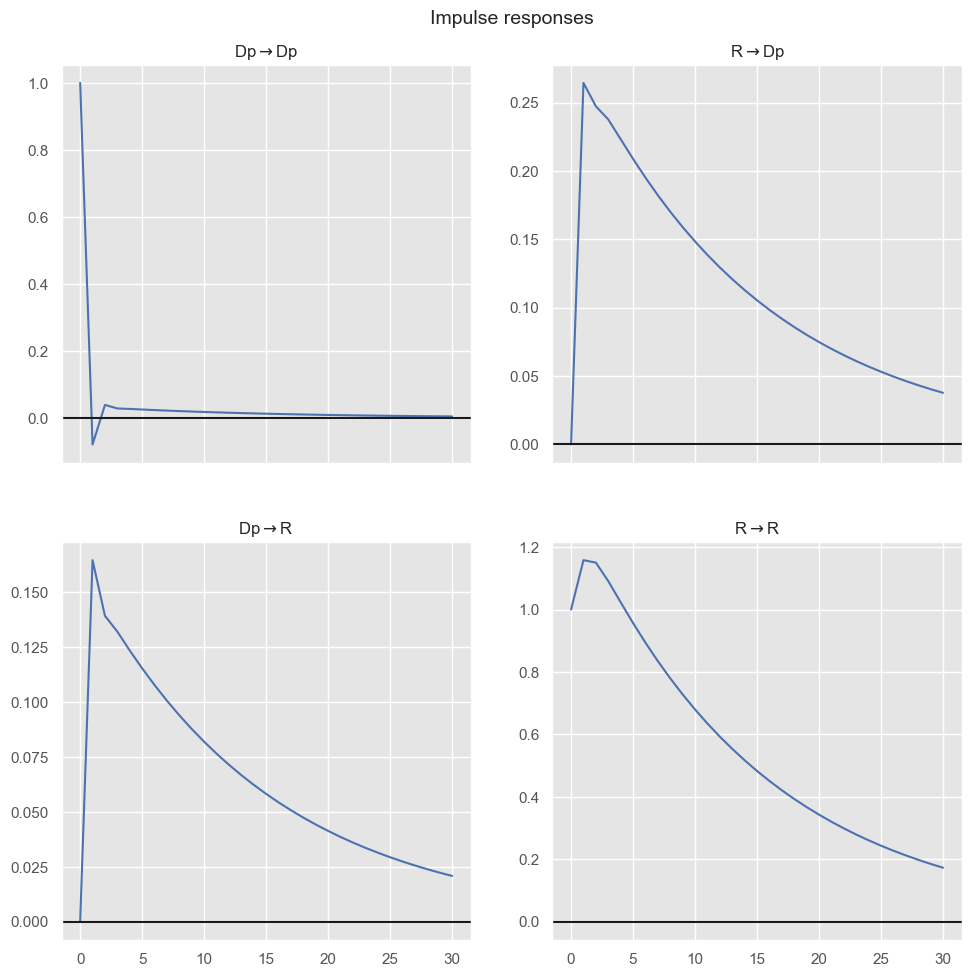

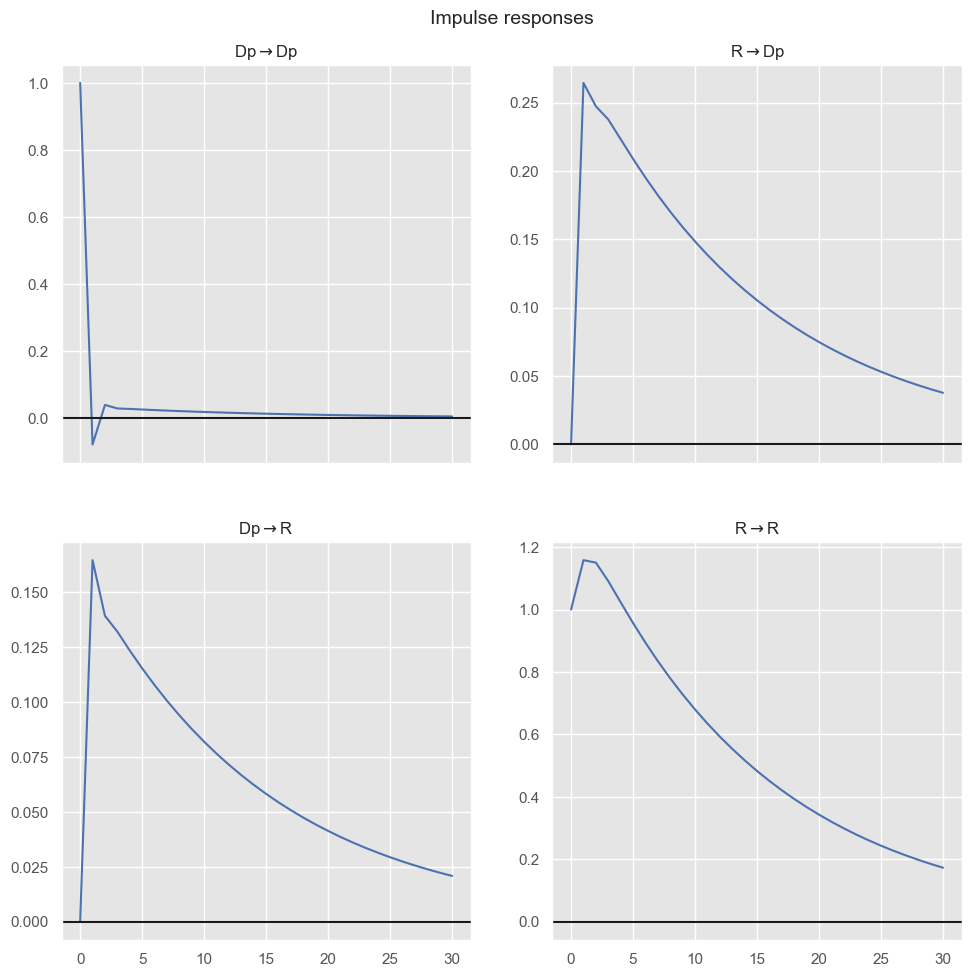

In [123]:
num_periods = 30
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False)

### Проверка на нормальность

In [124]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
68.21,9.488,0.000,4


In [125]:
print(norm_test)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 68.207, critical value: 9.488>, p-value: 0.000>


In [126]:
norm_test.test_statistic, norm_test.crit_value, norm_test.pvalue

(68.2070936882672, 9.487729036781154, 5.4246133925449285e-14)

### Остатки в автокорреляциях

In [127]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
55.32,55.76,0.054,40


In [128]:
print(white_test)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: fail to reject at 5% significance level. Test statistic: 55.318, critical value: 55.758>, p-value: 0.054>


In [129]:
white_test.test_statistic, white_test.crit_value, white_test.pvalue

(55.31795199247086, 55.75847927888702, 0.05422299357076534)

## Стурктурные модели векторной авторегрессии

Предположение об отсутствии одновременных эффектов было бы ошибочным для функции импульсного отклика, т. е. изменений в процессах, сопровождаемых шоком, воздействующим на определенную переменную.

**Модели SVAR:** Они явно моделируют одновременные эффекты между переменными:

Умножим VAR на $B_0$:

$$B_0y_t = B_0A_1y_{t-1} + ... + B_0A_py_{y-p} + B_0e_t$$

Определим:

$B_i = B_0A_i$

$\epsilon_t = B_0e_t$

$\epsilon_t$ — структурные шоки, которые удовлетворяют тем же условиям, что и остатки

**SVAR(p):**

$$B_0y_t = B_1y_{t-1} + ... + B_py_{y-p} + \epsilon_t$$

**SVAR(1)** с двумя переменными

$$\begin{bmatrix} 1 & B_{0;1,2} \\ B_{0;2,1} & 1 \end{bmatrix} \begin{bmatrix} y_{1,t} \\ y_{2,t} \end{bmatrix} = \begin{bmatrix} c_{0;1} \\ c_{0;2} \end{bmatrix} + \begin{bmatrix} B_{1;1,1} & B_{1;1,2} \\ B_{1;2,1} & B_{1;2,2} \end{bmatrix} \begin{bmatrix} y_{1,t-1} \\ y_{2,t-1} \end{bmatrix} + \begin{bmatrix} \epsilon_{1,t} \\ \epsilon_{2,t}\end{bmatrix}$$

Где:

$$\Sigma = E(\epsilon_t, \epsilon_t') = \begin{bmatrix} \sigma^2_1 & 0 \\ 0 & \sigma^2_2 \end{bmatrix} $$

Следовательно, **структурная форма** может быть получена из **редуцированной формы** с помощью умножения его на соответствующую матрицу параметров $A$, которая отражает **одновременные эффекты** среди переменных.

**Особенности структурной формы:** Дает базовые структурные экономические отношения

1. **Остаточные члены не коррелируют:** Структурные экономические шоки, которые управляют динамикой экономических переменных, предполагаются независимыми, что подразумевает нулевую корреляцию между остатками и желаемым свойством.

2. **Переменные могут иметь одновременное влияние на другие переменные:** Это желательная функция, особенно при использовании низкочастотных данных.

3. **Проблема идентификации параметров:** Параметры в $B$ нельзя оценить без дополнительных ограничений.

**Остаточные члены в приведенной форме VAR:** являются составными структурными шоками $e_t = B_0^-1\epsilon_t$, поэтому возникновение одного структурного шока $\epsilon_{i,t}$ может потенциально привести к возникновению шоков во всех ошибочных членах $e_{j,t}$, тем самым создавая одновременное движение во всех эндогенных переменных.

Это дает нам ковариационную матрицу приведенной VAR:

$$\Omega = E(e_t, e_t^{T}) = E(B_0^{-1}\epsilon_t\epsilon_t^{T}(B_0^{-1})^{T}) = B_0^{-1}\Sigma(B_0^-1)^{T}$$

Это может иметь ненулевые недиагональные элементы, что допускает ненулевую корреляцию между ошибочными членами.

$$var(u) = \begin{bmatrix} \sigma_1^2 & cov(u_1, u_2) & . & . & . & cov(u_1, u_n)
\\ cov(u_1, u_2) & \sigma_2^2 & . & . & . & cov(u_2, u_n) \\ . & . & . & . & . & . \\ . & . & . & . & . & . \\ cov(u_1, u_n) & cov(u_2, u_n) & . & . & . & \sigma_n^2\end{bmatrix}$$

### Модуль `svarlr`

Пакет `svarlr` python содержит функции для оценки структурных векторных авторегрессий с долгосрочными ограничениями. Он включает функции для оценки многомерных векторных авторегрессий с наложенными долгосрочными ограничениями, генерации фильтров импульсного отклика, последовательной загрузки и генерации минимальных доверительных интервалов расстояния.

In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import svarlr
import pandas_datareader as pdr
import seaborn as sns

%matplotlib inline
sns.set()

Общая производительность и рост общего количества занятости. Мы изучаем, как технологические потрясения влияют на занятость и наоборот.

In [131]:
series = pd.read_csv("Germany.csv")

In [132]:
series.index = series.Year
series = series.drop(['Year'],axis=1)
series

,TFP,TotHrGrowth
Year,,
1951-01-01,6.894657,1.037311
1952-01-01,5.080555,0.634502
1953-01-01,4.542223,1.454624
1954-01-01,3.185142,1.806637
1955-01-01,5.412597,2.032252
...,...,...
2012-01-01,-0.346423,-0.127787
2013-01-01,-0.059366,-0.288752
2014-01-01,0.591983,1.158355


Давайте определим некоторые переменные, прежде чем мы начнем оценивать модель. Нам нужно указать порядок лага (мы будем использовать 1 в этом примере), а также количество периодов для функций импульсного отклика и максимальное количество периодов, которые мы покажем на графике IRF.

In [133]:
p = 1       # order of VAR lag
nIR = 50    # number of periods for Impulse Response
nIRF = 5    # maximum periods shown in IRF graph

Функция `varlr` принимает ряд, который может быть массивом или фреймом данных (будет автоматически преобразован в массив), который является нашими данными. Второй параметр — это порядок VAR, и по умолчанию он равен 1.

In [134]:
[b, Sig, B] = svarlr.varlr(series,p) # VAR of order 'p'

`varlr` возвращает три объекта:
- b: Массив, который является вектором коэффициентов VAR [A0,A1,...,Ap].
- Sig: матрица дисперсии-ковариации ошибки приведенной формы.
- B: матрица структурного преобразования, вычисленная с наложенным долгосрочным ограничением. 

Функция `irflr` принимает три аргумента:
- b: Оцененные выше коэффициенты VAR.
- B: Структурная матрица для ошибки.
- nIR: Количество периодов IRF.

In [135]:
IRF = svarlr.irflr(b,B,nIR) # Impulse response (or MA coefficients)


`irflr` возвращает массив. 

$s-й$ столбец имеет $(s-1)$ период IRF 

$[ t(11) t(21) ... t(n1) t(12)...]'$

$t(ij)$ обозначает эффект $j$ шока на переменную $i$.

`cor` берет импульсную характеристику VAR и возвращает массив коэффициентов корреляции.

In [136]:
corr = svarlr.cor(IRF) # Correlations
print(corr)

[[ 0.22531014 -0.05921974  0.74241692]]


Чтобы получить импульсный отклик TFP, нам нужно получить все коэффициенты dTFP. Затем мы можем преобразовать массив в dataframe.

In [137]:
IRF = np.vstack([(IRF[0,:].cumsum()),
                 (IRF[1,:].cumsum()),
                 (IRF[2,:].cumsum()),
                 (IRF[3,:].cumsum())])

Теперь у нас есть функции импульсного отклика, но нам нужно выполнить бутстреппинг ряда, чтобы установить доверительные интервалы.

Сначала мы можем создать объекты для хранения различных результатов из цикла, который мы реализуем для выполнения бутстрепа.

In [138]:
Sim = 1000 # The number of bootstrap iterations

corr_b = []
IRF1 = []
IRF2 = []
IRF3 = []
IRF4 = []
srrsim = []

`bootstrap` принимает три аргумента:
- y: Ряд для бутстрепа.
- p: Порядок лагов.
- k: Количество начальных обрезаний наблюдений.

И возвращает бутстрепированный ряд.

In [139]:
for i in range(1,Sim+1):
    series_b = svarlr.bootstrap(series,p,len(series)+30) # Pseudo Series generated
    b_b,Sig_b,B_b = svarlr.varlr(series_b, p)
    IRF_b = svarlr.irflr(b_b,B_b,nIR)
    ith_cor = svarlr.cor(IRF_b)
    IRF1.append(IRF_b[0,:].cumsum()[np.newaxis])
    IRF2.append(IRF_b[1,:].cumsum()[np.newaxis])
    IRF3.append(IRF_b[2,:].cumsum()[np.newaxis])
    IRF4.append(IRF_b[3,:].cumsum()[np.newaxis])

IRF1 = np.vstack(IRF1)
IRF2 = np.vstack(IRF2)
IRF3 = np.vstack(IRF3)
IRF4 = np.vstack(IRF4)

Функция `band` вычисляет интервал минимального расстояния и принимает два аргумента:

- mat: Массив для вычисления интервалов.
- ptg: Десятичное представление процента доверительного интервала.

И возвращает доверительные интервалы.

In [140]:
band1 = svarlr.band(IRF1,.90);
band2 = svarlr.band(IRF2,.90);
band3 = svarlr.band(IRF3,.90);
band4 = svarlr.band(IRF4,.90);

Мы можем взять все вышеперечисленное и объединить в большой сюжет с четырьмя подсюжетами.

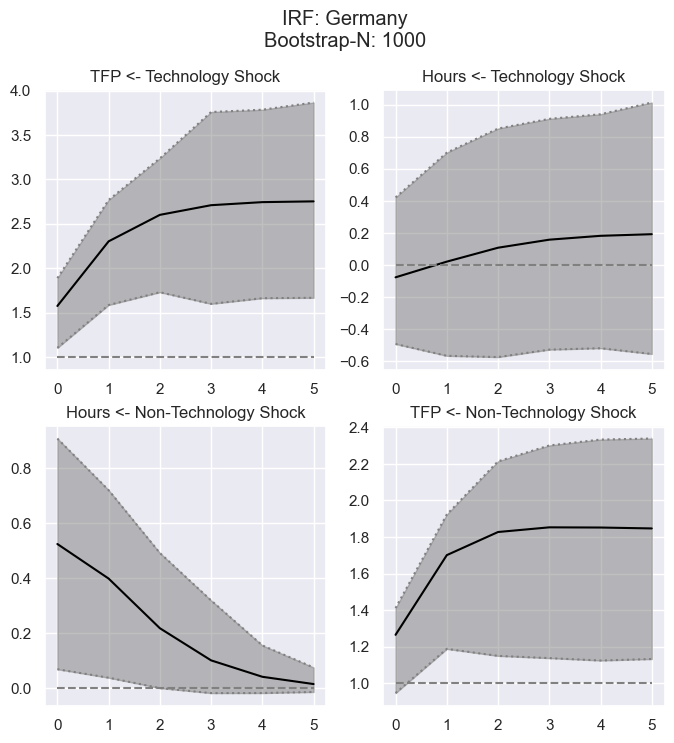

In [141]:
df_IRF = pd.DataFrame(IRF)

# First transpose the df. 
df_IRF = df_IRF.T
col_names = ['TFP <- Technology Shock', 'Hours <- Technology Shock','Hours <- Non-Technology Shock','TFP <- Non-Technology Shock']
df_IRF.columns = col_names

# Define graphic settings
t = nIRF+1
fig_size = (8, 8)
fig_dpi = 100 

# Build the plots
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=fig_size, dpi=fig_dpi)
fig.suptitle("IRF: Germany\nBootstrap-N: {}".format(Sim))

# First Plot
df_IRF.iloc[:t,0].plot(ax=axes[0,0], color='black'); axes[0,0].set_title('TFP <- Technology Shock')
axes[0,0].plot(band1.T[:t,:], color='gray',linestyle='dotted')
axes[0,0].plot(np.ones([t,1]), color='gray',linestyle='dashed')
axes[0,0].fill_between(np.arange(0,t,1),band1[0,:t], band1[1,:t],color='gray',alpha=0.5)

# Second Plot
df_IRF.iloc[:t,1].plot(ax=axes[0,1], color='black'); axes[0,1].set_title('Hours <- Technology Shock')
axes[0,1].plot(band2.T[:t,:], color='gray',linestyle='dotted')
axes[0,1].plot(np.zeros([t,1]), color='gray',linestyle='dashed')
axes[0,1].fill_between(np.arange(0,t,1),band2[0,:t], band2[1,:t],color='gray',alpha=0.5)
               
# Third Plot
df_IRF.iloc[:t,2].plot(ax=axes[1,0], color='black'); axes[1,0].set_title('Hours <- Non-Technology Shock')
axes[1,0].plot(band3.T[:t,:], color='gray',linestyle='dotted')
axes[1,0].plot(np.zeros([t,1]), color='gray',linestyle='dashed')
axes[1,0].fill_between(np.arange(0,t,1),band3[0,:t], band3[1,:t],color='gray',alpha=0.5)

# Fouth Plot
df_IRF.iloc[:t,3].plot(ax=axes[1,1], color='black'); axes[1,1].set_title('TFP <- Non-Technology Shock')
axes[1,1].plot(band4.T[:t,:],color='gray',linestyle='dotted')
axes[1,1].plot(np.ones([t,1]),color='gray',linestyle='dashed')
axes[1,1].fill_between(np.arange(0,t,1),band4[0,:t], band4[1,:t],color='gray',alpha=0.5)

plt.show()

Таким образом, мы зафиксировали линейные взаимозависимости между несколькими временными рядами, в данном случае общей производительностью факторов производства и общим ростом часов занятости в Германии с 1951 по 2016 год. 

# Байесовская модель временного ряда
# Bayesian Structural Time Series Model (BSTS-Модель)

Пусть $y_t$ обозначает наблюдение в момент времени  $t$ во временном ряду с дейсвительными значениями . BSTS  модель временного ряда описывается парой уравненеий относительно $y_t$ и вектора скрытых (латентных) переменных состояний $\alpha_t$

$$y_t = Z^T_t\alpha_t+\epsilon_t,~~ \epsilon_t\sim \mathcal N(0,\sigma^2)$$

$$\alpha_{t+1} = T_t \alpha_t+ R_t\eta_t,~~\eta_t\sim \mathcal N(0,Q_t)$$

Первое уравнение назвается уравнением *наблюдений* потому, что оно связывает наблюдаемемые величины $y_t$  с ненаблюдаемыми (латентными) состояниями $\alpha_t$. 

Второе уравнение называется уравнением  *перехода* потому, что оно  определяет динамику изменения латентных переменных во времени. 

Матрицы $Z_t$, $T_t$, and $R_t$ обычно состоят из наборов известных величин (часто 0 или 1) и неизвестных параметров. Матрица перехода  $T_t$ - квадратная , но  $R_t$ может быть прямоугольной, когда часть состояний не является случайной. 

Множество моделей временных рядов ,включая  ARIMA, может быть представлена в такой форме, что позднее и продемонстрируем.

### Пример 1. Модель локального уровня (Local level model).

Простейшей моделью временного ряда является модель локального уровня, в которой вектор $\alpha_t$  есть просто скалярная величина, задающая уровень  $\mu_t$ . Модель локального уровня это случайное блуждание.
$$y_t=\mu_t+\epsilon_t, ~~\epsilon_t\sim \mathcal N (0, \sigma^2_{\epsilon}) $$
 
$$\mu_{t+1}=\mu_t+\eta_t, ~~\eta_t\sim \mathcal N (0, \sigma^2_{\eta})$$

Здесь  $\alpha_t=\mu_t$ , и матрицы   $Z_t ,  T_t$ , и  $R_t$  сводятся к скаляру равному  1. Параметрами модели являются  дисперсии  $\epsilon_t \sim\mathcal N(0,\sigma^2)$  и  $\eta_t\sim \mathcal N(0,\tau^2)$ .

### Пример 2.Локальный линейный тренд (Local linear trend).

Чуть более сложной является модель с локальным линейным трендом. В этой модели оба параметра средний уровень $\mu_t$ и наклон $\nu_t$ ведут себя как случайное блуждание. Уравнения состояний и перехода для этой модели будут такие:
 
$$y_{t}= \mu_t+ \epsilon_t, ~~\epsilon_t\sim \mathcal N (0, \sigma^2_{\epsilon}).$$

$$\mu_{t+1}= \mu_t+ \nu_t+\xi_t, ~~\xi_t\sim \mathcal N (0, \sigma^2_{\xi}).$$

$$\nu_{t+1}=\nu_t+\zeta_t , ~~\zeta_t\sim \mathcal N (0, \sigma^2_{\zeta})$$

В локально линейной модели  тренд получается добавлением компоненты наклон $\nu_t$ в модель лоепльного уровня. Уравнение состояний в модели локального линейного тренда состоит из двух уравнений: первое для моделирования уровня $\mu_t$ и второе для моделтрования наклона. Наклон $\nu_t$  эквивалентен параметру  $b$ в классической регрессионной модели
$$y_t=a+bx_t+\epsilon_t$$

Величина b задает угол наклона линии регрессии с осью x. К параметрам предыдущий модели добавляется парапметр стандартного отклонения $\sigma_{\zeta}$ компоненты наклона $\nu_t$.  Начальное значение которого в первый момент времени $t=1$ часто берут из оценки классической регрессионной модели.


## Пример 2. Продолжение. Добавляем сезонную компоненту.

Если $S$ период сезонности, тогда вектор  $\tau$ - вектор сезонной компоненты. По определению аддитивной сезонной компоненты, сумма вклада сезооности за весь период полагается рраной нулю, поэтому первая компонента вектора $\tau_t$ полагается равной минус сумме остальных

$$\tau_t =-\sum_{s=1}^{S-1}\tau_{t-s}  +w_t,~~w_t \sim \mathcal N (0, \sigma^2_{w}).  $$

Итак, теперь наша в нашу BSTS модель из прошлого примера добавим эффект сезонности
$$y_{t+1}= y_t+ \nu_t + \tau_t+\epsilon_t, ~~\epsilon_t\sim \mathcal(N (0, \sigma^2_{\epsilon}).$$
$$\nu_{t+1} = \nu_t + \eta_t,~~   \eta_t \sim \mathcal N (0, \sigma^2_{\eta}).$$

$$\tau_t =-\sum_{s=1}^{S-1}\tau_{t-s}+ w_t,~~w_t \sim \mathcal N (0, \sigma^2_{w}).   $$


## Пример 3. AR(p) процесс как BSTS модель.
Рассмотрим реализацию BSTS модели на примере процесса авторегрессии AR(2).

Компонента состояний в данном случае будет
$$\alpha_t = \phi_1\alpha_{t−1} + · · · + \phi_p\alpha_{t−p} + \epsilon_{t-1} \epsilon_t \sim \mathcal N (0, \sigma^2)$$

Матрица перехода $T_t$ имеет первую строку как $\phi_i,i = 1,...2$ - параметры модели AR(2), единицы на главной диагонале в последующих строках и нули в остальных случаях. Ковариационная матрица $R$ в уравнении состояний  имеет $\sigma^2$ в левом вершнем угле и ноль иначе. Матрица наблюдений $Z^T_t$ имеет 1 как первый элемент  и ноль иначе.


In [142]:
import numpyro
numpyro.set_host_device_count(4)
import bsts
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np

Пробки на дорогах растут в городах по всему миру. Факторами, способствующими этому, являются рост городского населения, стареющая инфраструктура, неэффективное и нескоординированное время работы светофоров и отсутствие данных в реальном времени.

Датчики на каждом из этих перекрестков собирали данные в разное время, поэтому вы увидите данные о дорожном движении за разные периоды времени. Некоторые перекрестки предоставили ограниченные или разреженные данные, требующие вдумчивости при создании будущих прогнозов.

In [143]:
df = pd.read_csv('traffic.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime')
df['y']  = np.log(df['Vehicles'])
frame = pd.pivot_table(df, index='DateTime', values='y', columns='Junction').dropna()
frame.head()

Junction,1,2,3,4
DateTime,,,,
2017-01-01 00:00:00,3.295837,1.945910,2.302585,1.098612
2017-01-01 01:00:00,3.135494,2.197225,1.791759,0.000000
2017-01-01 02:00:00,2.833213,1.386294,1.945910,1.386294
2017-01-01 03:00:00,2.772589,1.386294,1.945910,1.386294
2017-01-01 04:00:00,2.772589,1.791759,1.609438,0.693147


In [ ]:
df

Чтобы увидеть сезонность, рассмотрим автокорреляцию первого перекрестка.

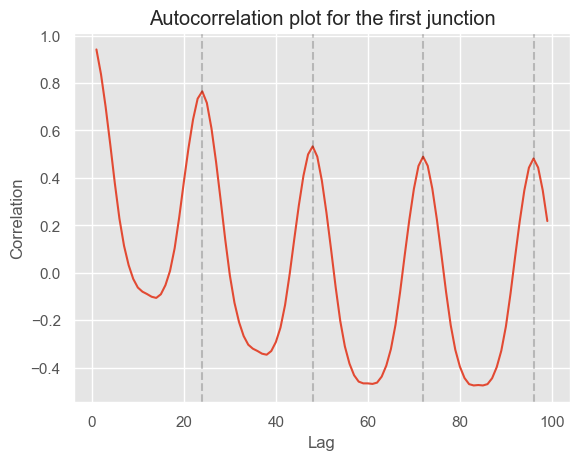

In [144]:
autocorr = {
    lag: np.corrcoef(frame.iloc[lag:, 0], frame.iloc[:-lag, 0])[0, 1]
    for lag in np.arange(1, 100)
}
autocorr = pd.Series(autocorr)
ax = autocorr.plot()
ax.set_title('Autocorrelation plot for the first junction')
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
for i in range(24, 100, 24):
    ax.axvline(i, c='black', linestyle='--', alpha=0.2)

Мы видим, что сезонность составляет 24, что имеет смысл, поскольку отчеты о дорожном движении поступают ежечасно.

Применяя следующую модель, мы используем другие перекрестки за час до этого, чтобы сделать прогнозы для первого перекрестка.

In [145]:
train_len = 24 * 10
test_len = 24 * 5

frame_sub = frame.iloc[-train_len - test_len:].values


y_train_test = frame_sub[:, 0]

# Train set
y_train = y_train_test[:train_len]

model = bsts.BSTS(seasonality=24)
model.fit(y_train)

/opt/anaconda3/lib/python3.12/site-packages/bsts/bsts.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(
sample: 100%|██████████| 4000/4000 [16:53<00:00,  3.95it/s, 1023 steps of size 2.88e-03. acc. prob=0.91]


(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: title={'center': 'Time series'}>,
        <Axes: title={'center': 'Trend'}>,
        <Axes: title={'center': 'Change in trend'}>,
        <Axes: title={'center': 'Seasonality'}>], dtype=object))

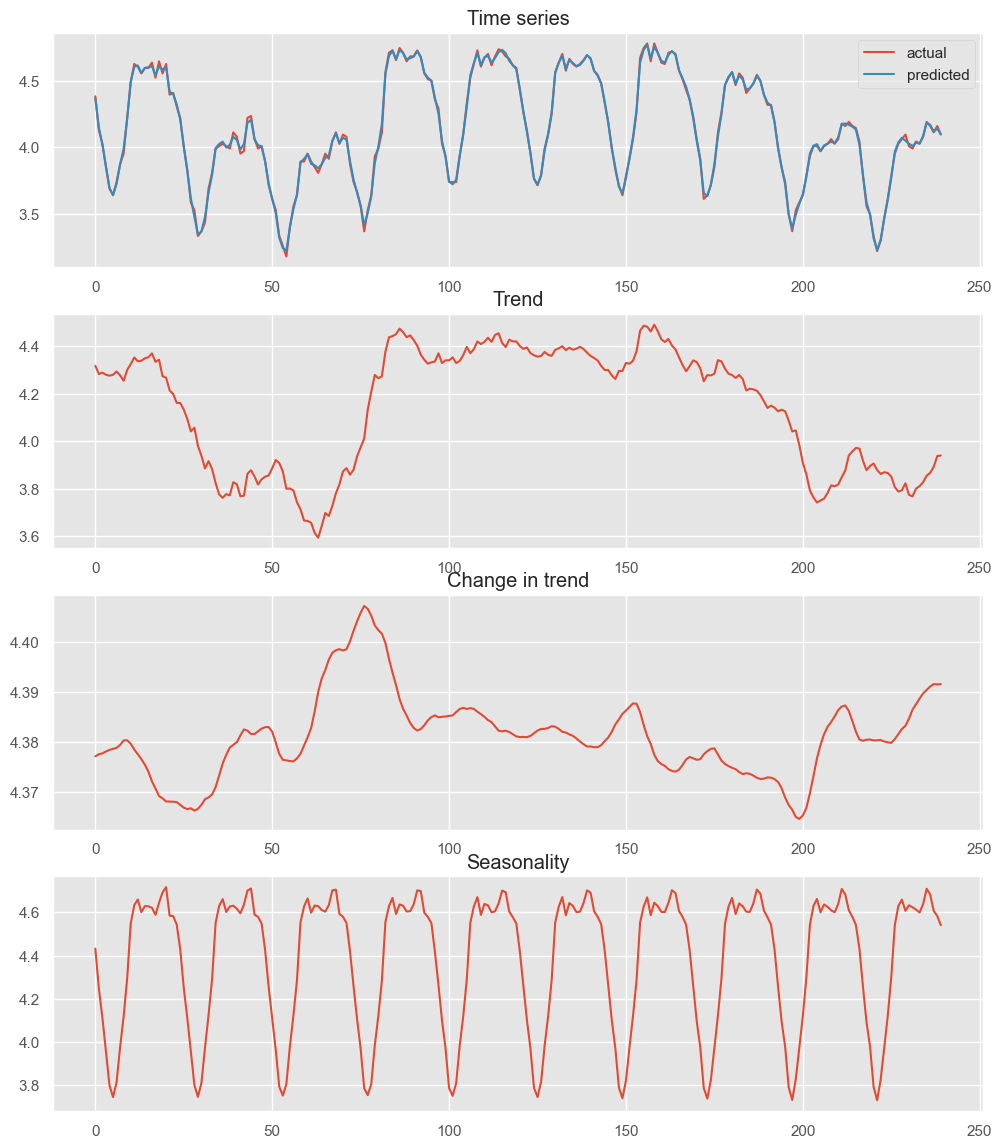

In [146]:
model.plot()

Мы можем получить прогнозы из модели. Метод `predict(k)` выведет матрицу `(num_samples, k)` для следующих `k` шагов.

In [147]:
model.predict(10).shape

(8000, 10)

Удобный метод построения графиков полезен при попытке визуализировать эффективность модели.

<Axes: >

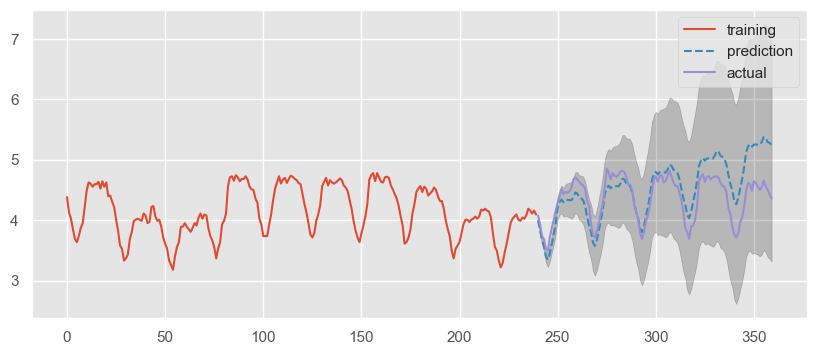

In [148]:
y_test = y_train_test[-test_len:]
model.plot_future(y_test)

Мы также можем запустить ту же модель с ковариатами, с добавлением случайных ковариаций

In [ ]:
X_train_test = frame_sub[:, 1:]
# Add some random covariates
state = np.random.RandomState(seed=1234)
X_random = state.normal(size=(len(X_train_test), 20))
X_train_test = np.concatenate([X_train_test, X_random], axis=1)

# Train set
state = np.random.RandomState(seed=1234)
X_train = X_train_test[:train_len, :]


model = bsts.BSTS(seasonality=24)
model.fit(y_train, X_train)

X_test = X_train_test[-test_len:, :]
model.plot_future(y_test, X_test)

/opt/anaconda3/lib/python3.12/site-packages/bsts/bsts.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(
warmup:  13%|█▎        | 506/4000 [03:21<24:22,  2.39it/s, 1023 steps of size 1.76e-03. acc. prob=0.78]

<AxesSubplot:>

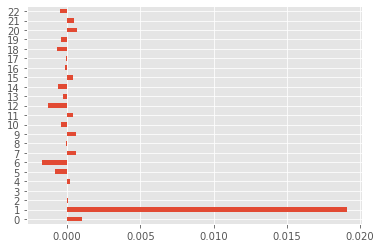

In [ ]:
pd.Series(model.samples['beta'].mean(axis=0)).plot(kind='barh')

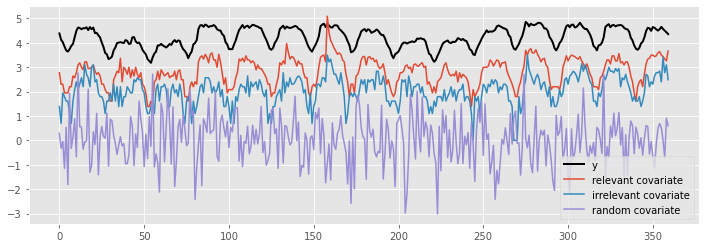

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_train_test, label='y', c='black', linewidth=2.0)
ax.plot(X_train_test[:, 1], label='relevant covariate')
ax.plot(X_train_test[:, 2], label='irrelevant covariate')
ax.plot(X_train_test[:, 20], label='random covariate')
ax.legend()